### Edgar Moises Hernandez-Gonzalez
#### 11/03/20-14/04/20
#### Imagen de STFT de EEG

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import cv2

In [0]:
# canal C3
# canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 7000:8000]
# canal C4 (usar este)
canal = pd.read_csv("/content/drive/My Drive/Documentos/Moyete/Estudiando/Programacion/PythonML/Espectros/MI-EEG-A01T.csv", header=None).iloc[:, 11000:12000]

(1000,)


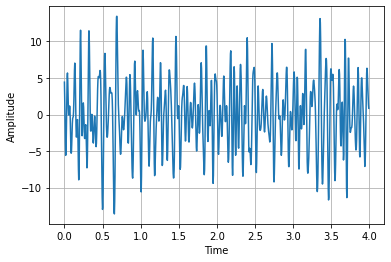

In [5]:
# Señal EEG del sujeto 1
# 4 segundos con fs=250Hz

fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal.iloc[2] #la muestra 2 es mano derecha
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

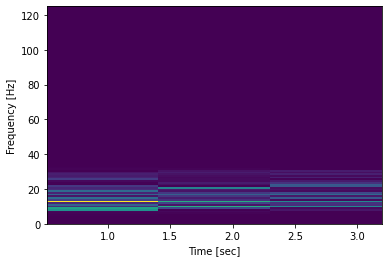

In [6]:
# Espectrograma con spectrogram, STFFT
f, t, Sxx = spectrogram(sig, fs)
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

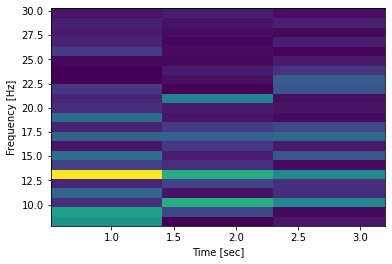

In [7]:
# Espectrograma con spectrogram, STFFT (Zoom)
f, t, Sxx = spectrogram(sig, fs)
plt.pcolormesh(t, f, Sxx)
plt.axis([0.512, 3.2, 7.81, 30.27])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

STFFT
(24, 4)


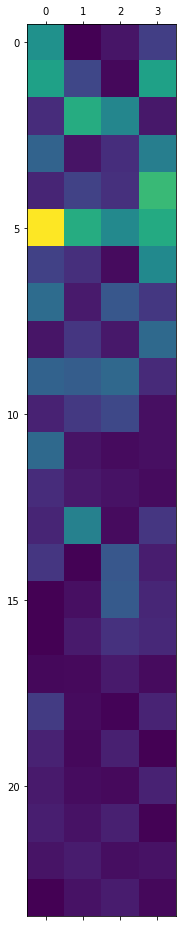

In [8]:
print("STFFT")
x = Sxx[8:32, :]
print(x.shape)
plt.matshow(x)
plt.show()

STFFT a escala de grises, esto es lo que se va a clasificar
(24, 4)
[[2.78097210e+00 8.44739472e-03 3.20460416e-01 1.03064098e+00]
 [3.14644215e+00 1.17556876e+00 1.31405014e-01 3.15504328e+00]
 [6.93553779e-01 3.41941954e+00 2.52126436e+00 3.50427749e-01]
 [1.75777474e+00 2.83598590e-01 7.23527291e-01 2.35842085e+00]
 [5.83139739e-01 1.09568829e+00 7.60447259e-01 3.73417775e+00]
 [5.50521693e+00 3.40785546e+00 2.59655615e+00 3.35971969e+00]
 [1.06342928e+00 7.52373660e-01 1.67460525e-01 2.62383525e+00]
 [1.94923522e+00 4.10392922e-01 1.50193377e+00 8.89172715e-01]
 [3.22403989e-01 8.68228957e-01 3.61818450e-01 1.87495525e+00]
 [1.73736637e+00 1.63658317e+00 1.86328009e+00 6.68661795e-01]
 [5.38008550e-01 9.13448085e-01 1.18649301e+00 2.23506742e-01]
 [1.89248237e+00 2.89375901e-01 1.55569136e-01 2.27411018e-01]
 [6.98146983e-01 3.76379685e-01 2.70354832e-01 1.65983766e-01]
 [5.84293322e-01 2.42343179e+00 1.74235640e-01 8.74164149e-01]
 [8.80165526e-01 3.78377707e-02 1.50329604e+00 4.5

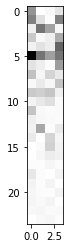

In [9]:
print("STFFT a escala de grises, esto es lo que se va a clasificar")
print(x.shape)
print(x)
plt.imshow(x, cmap='Greys')
plt.show()

(12, 8)


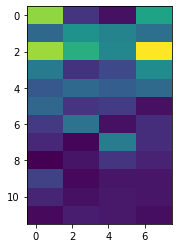

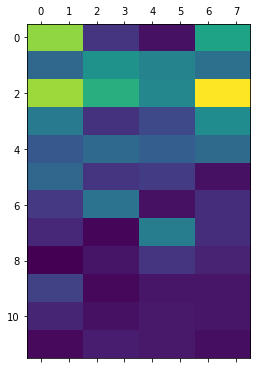

In [10]:
dim = (8, 12) #ancho, alto
resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()

##### Prueba de analisis de imagenes

In [0]:
#x2 = x
#x2 = MinMaxScaler(feature_range=(0, 255)).fit_transform(x)
#x2 = StandardScaler().fit_transform(x)

In [0]:
#talvez esta linea no hace falta porque /255 siempre da flotantes
#x2 = np.floor(x2) # aqui talvez puede ser ceil

In [0]:
#convertir a float
#x = x.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
#x /= 255.0

(24, 4)
[[1.09057724e-02 3.31270385e-05 1.25670747e-03 4.04172903e-03]
 [1.23389885e-02 4.61007329e-03 5.15313761e-04 1.23727191e-02]
 [2.71981885e-03 1.34094879e-02 9.88731068e-03 1.37422641e-03]
 [6.89323433e-03 1.11215143e-03 2.83736200e-03 9.24870931e-03]
 [2.28682254e-03 4.29681689e-03 2.98214611e-03 1.46438349e-02]
 [2.15890873e-02 1.33641390e-02 1.01825735e-02 1.31753720e-02]
 [4.17031068e-03 2.95048486e-03 6.56707969e-04 1.02895508e-02]
 [7.64405960e-03 1.60938397e-03 5.88993635e-03 3.48695181e-03]
 [1.26432942e-03 3.40481941e-03 1.41889590e-03 7.35276565e-03]
 [6.81320112e-03 6.41797343e-03 7.30698043e-03 2.62220297e-03]
 [2.10983749e-03 3.58214928e-03 4.65291366e-03 8.76497070e-04]
 [7.42149958e-03 1.13480748e-03 6.10075018e-04 8.91807897e-04]
 [2.73783132e-03 1.47599878e-03 1.06021506e-03 6.50916714e-04]
 [2.29134620e-03 9.50365420e-03 6.83277030e-04 3.42809479e-03]
 [3.45162954e-03 1.48383406e-04 5.89527842e-03 1.77324575e-03]
 [7.37445516e-05 8.70973861e-04 6.14368170e-03 

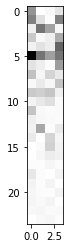

In [14]:
# los valores siempre son float
#print(x2.shape)
#print(x2)
#plt.imshow(x2, cmap='Greys')
#plt.show()

In [0]:
imgRGB = np.zeros((24,4,3))

In [0]:
imgRGB[:,:,0] = x
imgRGB[:,:,1] = x
imgRGB[:,:,2] = x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(24, 4, 3)


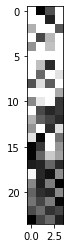

In [14]:
# esta es la imagen final
print(imgRGB.shape)
plt.imshow(imgRGB)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(24, 4, 3)


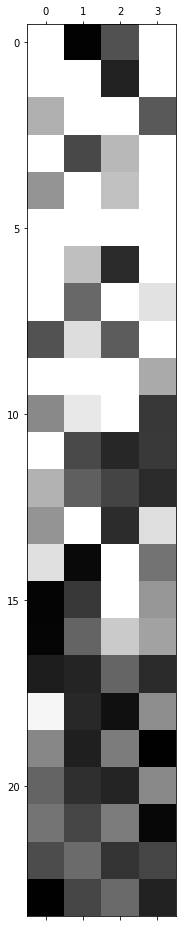

In [15]:
# creo esta es la imagen chida
print(imgRGB.shape)
plt.matshow(imgRGB)
plt.show()